<a href="https://colab.research.google.com/github/SedyaPrograms/Tutorial/blob/main/AI%20and%20machine%20learning/5_%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_%D0%93%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Логистическа регрессия

## задача: перейти от линейной регрессии к логистической

In [ ]:
# срипт линейное регрессии со стохастическим град. спуском
# у нас есть истинный "у" (y_true), а есть тот, что мы угадываем (y_pred), так вот ошибка между ними это разность, а чтоб не учитывать знак возводим в квадрат
# Если "у" много (для конкретики n), то сумма большого числа м.б больше выборки из малого числа(m), поэтому делим на количество "у" в выборке : (2+3+4)/3 = 3, (1+2+3+4+5+6+7+8+9)/9 = 5. 
# выборка чисел в примере больше в 3 раза, а итог меньше чем в 2 раза
def loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).sum() / len(y_true)


# градиент для функции потерь по w0 и w1 (взяли производные от выражения для loss по w0 и w1)
def loss_grad(x, y_true, w0, w1):
    grad_w0 = -2.0 * np.sum(y_true - (w0 + w1 * x)) / len(y_true)
    grad_w1 = -2.0 * np.sum((y_true - (w0 + w1 * x)) * x) / len(y_true)
    return grad_w0, grad_w1

# наш знакомы спуск, на вход: стартовые х,у, кол-во макс итераций (в нейросетках говорят эпохи), длина шага
def gradient_descent(x, y, epochs=10, lr=0.001):
    w0 = 0.0 # вес перед Х
    w1 = 0.0 # вес перед Х
    mse_history = [loss(y, w0 + w1 * x)] # сохраняем среднеквадратичные ошибки(функции потерь)
    epoch = 0 # эпоха (счетчик)
    while epoch < epochs:

        grad_w0, grad_w1 = loss_grad(x, y, w0, w1) # считаем градиент
        y_pred = w0 + w1 * x # вычисляем предсказанное у

        mse = loss(y, y_pred) #СКО
        mse_history.append(mse) # пополнили историю СКО

        w0 = w0 - lr * grad_w0 # тут сделали "шаги" в сторону оптимизации весов
        w1 = w1 - lr * grad_w1

        if epoch % 30 == 0: # каждые 30 эпох делается отчет: СКО, простановка точки (истинной и пресказанной), пауза
            print(mse)
            plt.plot(x, y, 'bo')
            plt.plot(x, w0 + w1 * x, 'r-')
            plt.pause(0.001)

        epoch += 1
    return w0, w1, mse_history

делаем дата-сет

In [ ]:
from sklearn.datasets import make_classification

x, y = make_classification(n_samples=40,
                           n_features=1,
                           n_informative=1,
                           n_redundant=0,
                           n_classes=2,
                           n_clusters_per_class=1)
x = x.reshape(-1)

Смотрим x и y

In [ ]:
print(x)

[-1.16870733 -3.47699463 -0.48422049  1.55142601  1.27335605  0.13703416
  0.89360852  1.87599755 -1.68920028  0.34618361 -0.18822747  0.95101459
  0.01352103 -1.58178549  0.22693913  0.4048028   0.40582961 -1.37338152
  0.45777763  1.83031869 -1.82143275  0.23628577  0.82145872 -0.35359903
 -0.29099349  1.39261308  2.49141922 -2.1506596   1.5288056   1.62838615
  1.56240365 -0.71055395 -1.8514454  -0.21342341 -1.03280644  0.39582042
 -0.22601961 -0.08247472 -2.5597867   0.23431601]


In [ ]:
print(y)

[0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1
 0 0 1]


Теперь думаем как изменить, вспоминаем прошлое занятие
*   надо сделать функцию сигмоиды
*   изменить лосс фушкции и градиеты - нужно их переписать 
*   метрику СКО(mse) мы заменим после









Как изменим?
тут исходник - линейная и на ней либо удаляю, либо заменяю названия, существенное изменение делаю отдельно

In [ ]:
def loss(y_true, y_pred): 
    return ((y_true - y_pred) ** 2).sum() / len(y_true) # need fix

def loss_grad(x, y_true, w0, w1): # need fix
    grad_w0 = -2.0 * np.sum(y_true - (w0 + w1 * x)) / len(y_true)
    grad_w1 = -2.0 * np.sum((y_true - (w0 + w1 * x)) * x) / len(y_true)
    return grad_w0, grad_w1

# need sigma

def gradient_descent(x, y, epochs=10, lr=0.001):
    w0 = 0.0 
    w1 = 0.0
    loss_history = [loss(y, w0 + w1 * x)] # mse_history -> loss_history
    epoch = 0 
    while epoch < epochs:
        grad_w0, grad_w1 = loss_grad(x, y, w0, w1) 
        y_pred = w0 + w1 * x 

        loss_result = loss(y, y_pred) # mse -> loss_result
        loss_history.append(loss_result) 

        w0 = w0 - lr * grad_w0 
        w1 = w1 - lr * grad_w1

        epoch += 1
    return w0, w1, loss_history

Мы рассматривали метод макс правдоподобия, по нему l -> max, но у нас же суть найти минимум

как сделать переход max -> min?

если мы возьмем функцию с минусом, то нахождение ее максимума - это будет нахождение минимума функции без минуса

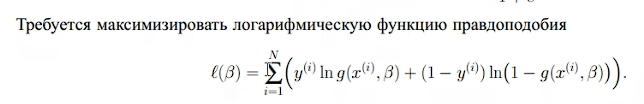

применим это


  fix loss functin:

  в качестве loss возьмем т.н. кросс- энтропию ( logloss-функцию)

  y_true * np.log(g(x,w0, w1)) + (1 - y) * np.log(1 - g(x,w0, w1)) - соответсвует формуле выше

  возьмем функцию с минусом (умножим на -1):

  -y_true * np.log(g(x,w0, w1)) - (1 - y) * np.log(1 - g(x,w0, w1)) 

  надо что-то поменять, чтобы заработало

```
def loss(x, y_true, w0, w1):
  n = len(y_true)
  logloss = np.sum(y_true * np.log(g(x,w0, w1)) + (1 - y) * np.log(1 - g(x,w0, w1)))/n

  return -logloss
```
почему мы делим на n?
чтоб не зависило от количества sample


надо сделать реализацию для функции g()

напомню формулу

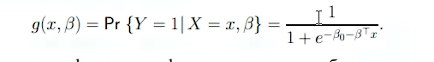

In [ ]:
import numpy as np

def g(x,w0, w1):
  G = 1.0/ (1.0 + np.exp(-w0 - w1 * x))
  return G
# Вопрос: а где ты сделал транспонировние для w1 - ответ: фича 1 и транспонировать то особо и нечего  
# Один формата float пишется потому, что на выходе планируем получить float

# ну и назовем нашу функцию по имени - sigmoid: 
def sigmoid(x,w0, w1):
  return 1.0/ (1.0 + np.exp(-w0 - w1 * x))
# вот и первое измение сделали

In [ ]:
sigmoid(0 ,0, 0)

0.5

In [ ]:
sigmoid(-5 ,-5, -5)

0.9999999979388463

ну тогда loss функция 

In [ ]:
import numpy as np
def loss(x, y_true, w0, w1):
  n = len(y_true)
  sigmoid_result = sigmoid(x,w0, w1)
  logloss = np.sum(y_true * np.log(sigmoid_result) + (1 - y) * np.log(1 - sigmoid_result))/n
  return -logloss

еще немного изменим

In [ ]:
import numpy as np
def loss(x, y_true, w0, w1):
  n = len(y_true)
  sigmoid_result = sigmoid(x,w0, w1)
  zero_class = y_true * np.log(sigmoid_result)
  one_class = (1 - y_true) * np.log(1 - sigmoid_result)
  logloss = np.sum(zero_class + one_class)/n
  return -logloss

на всякий случай сделаем 
```
assert y_true.shape == zero_class.shape
assert y_true.shape == one_class.shape
```
чтоб не допустить того, что у нас не правильно считаются градиенты, а мы и не вкурсе

Кстати пора бы изменить подсчет градиентов

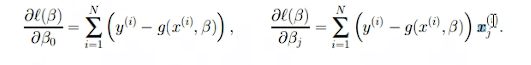

In [ ]:
def loss_grad(x, y_true, w0, w1): 
    sigmoid_result = sigmoid(x,w0, w1)
    grad_w0 = (y_true - sigmoid_result).sum()
    grad_w1 = ((y_true - sigmoid_result) @ x) .sum() # @ - скалярное произведение
    return grad_w0, grad_w1

но мы немного модернизировали нашу loss функцию делением на n и умножением на (-1), поэтому надо бы и тут это провернуть

In [ ]:
def loss_grad(x, y_true, w0, w1): 
    assert x.shape == y_true.shape 
    
    n = len(y_true)
    sigmoid_result = sigmoid(x,w0, w1)

    assert y_true.shape == x.shape

    grad_w0 = - (y - sigmoid_result).sum() / n
    grad_w1 =  - ((y - sigmoid_result) @ x) .sum() / n # @ - скалярное произведение
    return grad_w0, grad_w1

немного корректируем цикл

In [ ]:
def gradient_descent(x, y, epochs=10, lr=0.001):
    w0 = 0.0 
    w1 = 0.0
    loss_history = [loss(x, y, w0, w1)] # fix argument loss
    epoch = 0 
    while epoch < epochs:
        grad_w0, grad_w1 = loss_grad(x, y, w0, w1) 

        loss_result = loss(x, y, w0, w1) # fix argument loss
        loss_history.append(loss_result) 

        w0 = w0 - lr * grad_w0 
        w1 = w1 - lr * grad_w1

        epoch += 1
    return w0, w1, loss_history

Соберем все вместе для наглядности и удобства

In [ ]:
import numpy as np

def sigmoid(x,w0, w1):
  return 1.0/ (1.0 + np.exp(-w0 - w1 * x))

def loss(x, y_true, w0, w1):
    n = len(y_true)
    sigmoid_result = sigmoid(x,w0, w1)
    zero_class = y_true * np.log(sigmoid_result)
    one_class = (1 - y_true) * np.log(1 - sigmoid_result)
    logloss = np.sum(zero_class + one_class)/n
    return -logloss

def loss_grad(x, y_true, w0, w1): 
    assert x.shape == y_true.shape 
    
    n = len(y_true)
    sigmoid_result = sigmoid(x,w0, w1)

    assert y_true.shape == x.shape

    grad_w0 = - (y_true - sigmoid_result).sum() / n
    grad_w1 =  - ((y_true- sigmoid_result) @ x) .sum() / n 
    return grad_w0, grad_w1    

def gradient_descent(x, y, epochs=10, lr=0.001):
    w0 = 0.0 
    w1 = 0.0
    loss_history = [loss(x, y, w0, w1)] 
    epoch = 0 
    while epoch < epochs:
        grad_w0, grad_w1 = loss_grad(x, y, w0, w1) 

        loss_result = loss(x, y, w0, w1) 
        loss_history.append(loss_result) 

        w0 = w0 - lr * grad_w0 
        w1 = w1 - lr * grad_w1

        epoch += 1
    return w0, w1, loss_history

проверим

In [ ]:
from sklearn.datasets import make_classification

x, y = make_classification(n_samples=40,
                           n_features=1,
                           n_informative=1,
                           n_redundant=0,
                           n_classes=2,
                           n_clusters_per_class=1)
x = x.reshape(-1)
gradient_descent(x, y)

(2.461609922694008e-07,
 0.004798595607779584,
 [0.6931471805599453,
  0.6931471805599453,
  0.6929164051927594,
  0.6926857499971278,
  0.692455214910329,
  0.6922247998696549,
  0.6919945048124106,
  0.6917643296759146,
  0.6915342743974989,
  0.6913043389145083,
  0.6910745231643014])

посмотрим графики

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss')

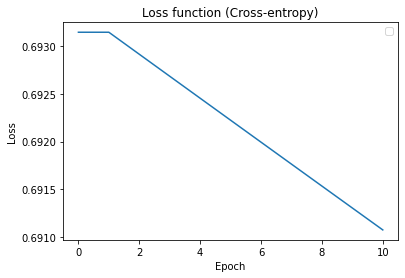

In [ ]:
_,_,loss_history = gradient_descent(x, y) # тут считаем loss_history, остальные выходные данные gradient_descent на мне важны
 
plt.plot(np.arange(0, len(loss_history)), loss_history)
plt.legend()

plt.title('Loss function (Cross-entropy)')
plt.xlabel('Epoch')
plt.ylabel('Loss')

loss убывет, но не сильно, поиграемся с epochs

Text(0, 0.5, 'Loss')

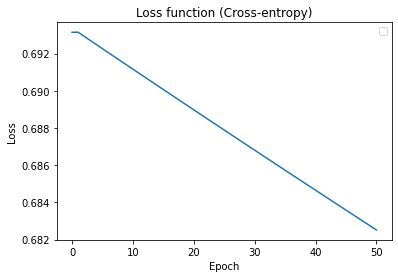

In [ ]:
_,_,loss_history = gradient_descent(x, y, epochs = 50) # тут считаем loss_history, остальные выходные данные gradient_descent на мне важны
 
plt.plot(np.arange(0, len(loss_history)), loss_history)
plt.legend()

plt.title('Loss function (Cross-entropy)')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

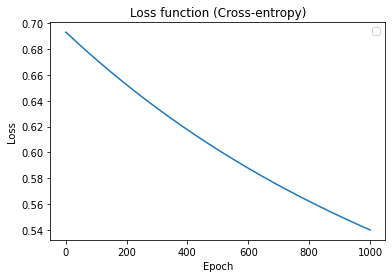

In [ ]:
_,_,loss_history = gradient_descent(x, y, epochs = 1000) 
 
plt.plot(np.arange(0, len(loss_history)), loss_history)
plt.legend()

plt.title('Loss function (Cross-entropy)')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

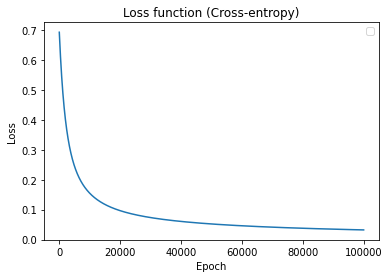

In [ ]:
w0,w1,loss_history = gradient_descent(x, y, epochs = 100000) 
 
plt.plot(np.arange(0, len(loss_history)), loss_history)
plt.legend()

plt.title('Loss function (Cross-entropy)')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [ ]:
w0, w1

(0.4768169195902089, 2.3516284219752164)

Ну вот вроде бы сходится наша loss функция, поглядели веса и теперь как всегда посмотрим sclearn  

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='none')
logreg.fit(x.reshape(-1, 1), y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

как-то обучилась логистическая регрессия посмотрим, что у нее получилось и сравним с нашей


In [ ]:
logreg.coef_, logreg.intercept_

(array([[2.36578647]]), array([0.48654313]))

довольно сильно отличаются

проблема мб в то, что мы переобучили нашу loss функцию, а у sklearn, наверно, есть оптимизирующие параметры

In [ ]:
loss_history[-5]

0.3198927759961494

In [ ]:
print(y) # 40 штук y

print(sum(y)) #20 из них принадлежат 1, 20 - 0

[1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0
 0 0 1]
20


посмотрим acuracy

In [ ]:
#sigmoid(x, w0, w1) - будет индекатором к какому классу относится объект (больше 0.5, то 1, иначе 0)
(sigmoid(x, w0, w1) > 0.5).astype(int) # тут всё выводится в True и False, но эта команда делает все в 1 и 0

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

видно, что угадали все sample

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(logreg.predict(x.reshape(-1,1)), y)

1.0

=1 отлично

отсортируем х по координате

In [ ]:
indicies = x.argsort()

In [ ]:
x[indicies]
y[indicies]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Итересная ситуация: у нас были, скажем, черные фичи, а потом они резко стали белые - т.е. произошло разделение

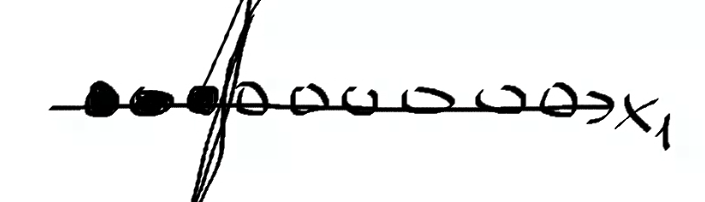

надо подумать как подобрать параметры, чтобы находить это разделение

тут 2 враринта развития:


1.   Добавить больше фичей, но по плану обучения у нас это потом
2.   Перемешать фичи, чтобы выборка не была линейно разделима

раз первый не можем, то берем второй

Смотроим параметры у sklearn.Classifocation
сделаем новый дата-сет

In [ ]:
from sklearn.datasets import make_classification

x, y = make_classification(n_samples=1500,
                           n_features = 1,  # количество фич, больше фич заставят нас изменить алгоритм
                           n_informative = 1, # количество полезных фич
                           n_redundant=0, # количество бесполезных фич - например, количество продаваемы бананов, не особо влияет на выход нового фильма (если он не про бананы)
                           n_classes=2, # количество классов
                           n_clusters_per_class=1, # количетсво класстеров для 1 класса - количетво мест группировки точек 1 класса (ниже есть примеры про кластеры)
                           flip_y=0.08, # если наша модель может хоорошо предсказывать модели, то больше 0,92 не получит
                            )


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='none')
logreg.fit(x.reshape(-1, 1), y)

print(logreg.coef_, logreg.intercept_)
print('accuracy_score = ', accuracy_score(logreg.predict(x.reshape(-1,1)), y))

[[2.30491948]] [-0.27371891]
accuracy_score =  0.8806666666666667


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Ну что мы видим: даже модель sklearn не может на этом дата-сете сделать 100% предсказание - не может переобучиться

Попробуем скомбинировать несколько фичей, сделаем новую выборку

In [ ]:
from sklearn.datasets import make_classification

x, y = make_classification(n_samples=1500,
                           n_features = 1,  # количество фич, больше фич заставят нас изменить алгоритм
                           n_informative = 1, # количество полезных фич
                           n_redundant=0, # количество бесполезных фич - например, количество продаваемы бананов, не особо влияет на выход нового фильма (если он не про бананы)
                           n_classes=2, # количество классов
                           n_clusters_per_class=1, # количетсво класстеров для 1 класса - количетво мест группировки точек 1 класса (ниже есть примеры про кластеры)
                           flip_y=0.08, # если наша модель может хоорошо предсказывать модели, то больше 0,92 не получит
                            )
x = x.reshape(-1)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='none')
logreg.fit(np.vstack((x, x ** 2)).T, y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

In [ ]:
np.vstack((x, x ** 2)).shape

(2, 1500)

In [ ]:
accuracy_score(logreg.predict(np.vstack((x, x ** 2)).T), y)

0.9366666666666666

еще увеличим порядок полинома ну до 30, например

In [ ]:
logreg = LogisticRegression(penalty='none')
logreg.fit(np.vstack((  tuple([x **i for i in range(30)])   )).T, y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none')

тут алгоритм не сходится немного, но у нас похожая ситуация уже была

In [ ]:
accuracy_score(logreg.predict(np.vstack(  tuple([x **i for i in range(30)])   ).T), y)

0.5086666666666667

возможно из-за слишкомбольшого кол-ва фичей и алгоритм не смог доучиться, добавим параметров и сделаем больше итераций, ну и фичей поменьше всё-таки

In [ ]:
logreg = LogisticRegression(penalty='none', max_iter = 2000)
logreg.fit(np.vstack((  tuple([x **i for i in range(15)])   )).T, y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=2000, penalty='none')

выборка даже сошлась

In [ ]:
accuracy_score(logreg.predict(np.vstack(  tuple([x **i for i in range(15)])   ).T), y)

0.9346666666666666

ну вот такая accuracy

вернемся к тому как было

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='none')
logreg.fit(x.reshape(-1, 1), y)

print(logreg.coef_, logreg.intercept_)
print('accuracy_score = ', accuracy_score(logreg.predict(x.reshape(-1,1)), y))

[[2.90489138]] [0.1676681]
accuracy_score =  0.9326666666666666


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Попробуем еще немного подредактировать наш алгоритм - структурируем его ( см раздел "Логистическая регрессия")

## Пример про кластеры

Замечание примеры представлены для 2х фич, для 1 фичи распределение будет на линии

Класстеры можно разделить кривой 

I)1 кластер

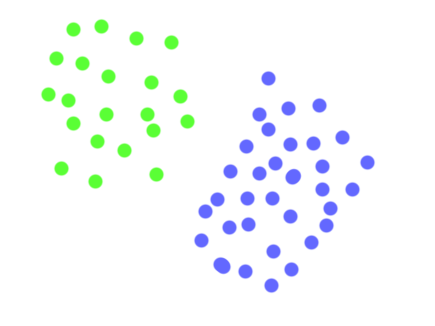

II)1 кластер фиолетового класса

   2 кластера зеленого класса

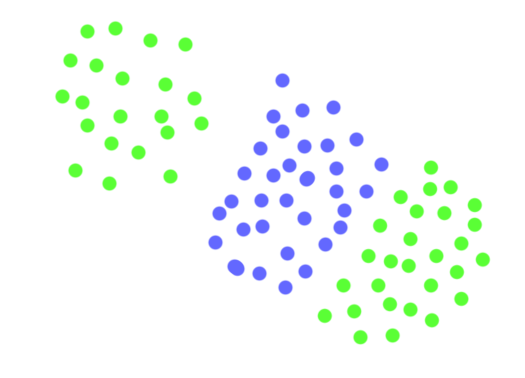

## Логистическая регрессия

* ### imports


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

* ### Constants


In [ ]:
RANDOM_SEED = 42

* ### dataset

делаем дата-сет

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1500,
                           n_features = 1,
                           n_informative= 1,
                           n_redundant=0,
                           n_classes=2,
                           n_clusters_per_class=1,
                           flip_y=0.08, 
                           random_state=RANDOM_SEED) # добавили шуму
X = X.reshape(-1)

Импортируем  **train_test_split**

Передаем X_train, X_test, y_train, y_test

Тестовый диапазон делаем 15% от выборки 

Добавим RANDOM_SEED - перемешает входные данные - добавив этот параметр тут, мы должны догбаыить его в **make_classification**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.15,
                                                    random_state=RANDOM_SEED)

In [ ]:
X_train.shape, X_test.shape  

((1275,), (225,))

Получили 1275 на 225, в сумме 1500 sample, которые были в начале


модернизируем алгоритм

* ### gradient descent (logistic regression)

## Version 1

под 1 фичу

In [ ]:
import numpy as np

def sigmoid(x,w0, w1):
  return 1.0/ (1.0 + np.exp(-w0 - w1 * x))

def loss(x, y_true, w0, w1):
    n = len(y_true)
    sigmoid_result = sigmoid(x,w0, w1)
    zero_class = y_true * np.log(sigmoid_result)
    one_class = (1 - y_true) * np.log(1 - sigmoid_result)
    logloss = np.sum(zero_class + one_class)/n
    return -logloss

def loss_grad(x, y_true, w0, w1): 
    assert x.shape == y_true.shape 
    n = len(y_true)
    sigmoid_result = sigmoid(x,w0, w1)

    assert sigmoid_result.shape == x.shape

    grad_w0 = - (y_true - sigmoid_result).sum() / n
    grad_w1 =  - ((y_true- sigmoid_result) @ x) .sum() / n 
    return grad_w0, grad_w1  

# Функция делает сравнение sigmoid(x, w) > 0.5, если True, то берет первое занчение(1), иначе - второе (0)
def prediction(x,  w0, w1): 
    return np.where(sigmoid(x, w0, w1) > 0.5, 1, 0)

def gradient_descent(X_train, y_train,X_test, y_test, epochs=10, lr=0.001):
    w0 = 0.0 
    w1 = 0.0
# loss_history -> loss_train, loss_test
    loss_train = [loss(X_train, y_train, w0, w1)]
    loss_test = [loss(X_test, y_test, w0, w1)]

    accuracy_test = [accuracy_score(y_test, prediction(X_test, w0, w1))] # сотрим accuracy на каждом шагу

    epoch = 0 
    while epoch < epochs:
        grad_w0, grad_w1 = loss_grad(X_train, y_train, w0, w1) 

        #loss_history->loss_train, loss_test
        loss_train.append(loss(X_train, y_train, w0, w1))
        loss_test.append(loss(X_test, y_test, w0, w1))

        # добавили accuracy
        accuracy_test.append(accuracy_score(y_test, prediction(X_test, w0, w1)))

        w0 = w0 - lr * grad_w0 
        w1 = w1 - lr * grad_w1

        epoch += 1
    return w0, w1, loss_train, loss_test, accuracy_test

In [ ]:
w0, w1, loss_train, loss_test, accuracy_test = gradient_descent(X_train, y_train, X_test, y_test, epochs=100000)

Text(0, 0.5, 'Loss')

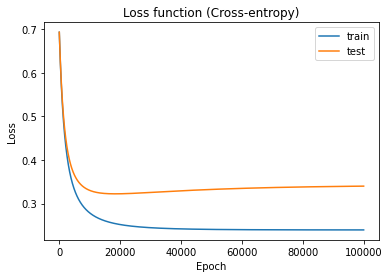

In [ ]:
plt.plot(np.arange(0, len(loss_train)), loss_train, label='train')
plt.plot(np.arange(0, len(loss_test)), loss_test, label='test')
plt.legend()

plt.title('Loss function (Cross-entropy)')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Переобучились - он тест не падает, а train продолжает убывать, более того когда train +- выровнился test растет 

Text(0, 0.5, 'Accuracy')

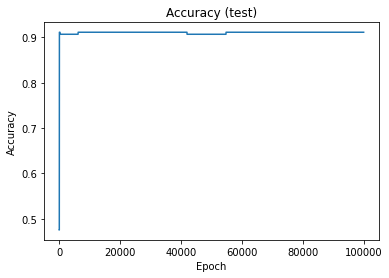

In [ ]:
plt.plot(np.arange(0, len(accuracy_test)), accuracy_test)

plt.title('Accuracy (test)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

почему он такой странный?

у нас простая выборка и ее легко разделить и за первые 100 выборок получется их разделить

увеличим кол-во flip

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1500,
                           n_features = 1,
                           n_informative= 1,
                           n_redundant=0,
                           n_classes=2,
                           n_clusters_per_class=1,
                           flip_y=0.30, 
                           random_state=RANDOM_SEED) # добавили шуму
X = X.reshape(-1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.15,
                                                    random_state=RANDOM_SEED)

In [ ]:
w0, w1, loss_train, loss_test, accuracy_test = gradient_descent(X_train, y_train, X_test, y_test, epochs=100000)

Text(0, 0.5, 'Loss')

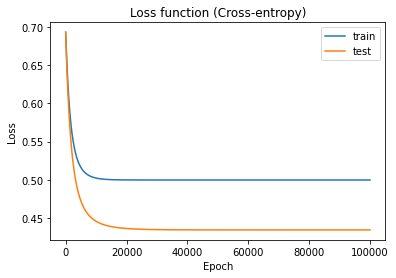

In [ ]:
plt.plot(np.arange(0, len(loss_train)), loss_train, label='train')
plt.plot(np.arange(0, len(loss_test)), loss_test, label='test')
plt.legend()

plt.title('Loss function (Cross-entropy)')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

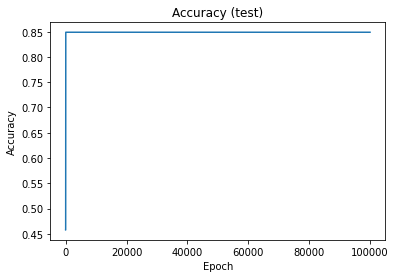

In [ ]:
plt.plot(np.arange(0, len(accuracy_test)), accuracy_test)

plt.title('Accuracy (test)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

ну считаем, что с примером не повезло и у нас такая фича, что сразу прыгает в оптимум.

## Version 2

Для двух фичей

In [ ]:
RANDOM_SEED = 55

In [239]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1500,
                           n_features = 2,
                           n_informative= 2,
                           n_redundant=0,
                           n_classes=2,
                           n_clusters_per_class=1,
                           flip_y=0.03, 
                           random_state=RANDOM_SEED) # добавили шуму

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.15,
                                                    random_state=RANDOM_SEED)

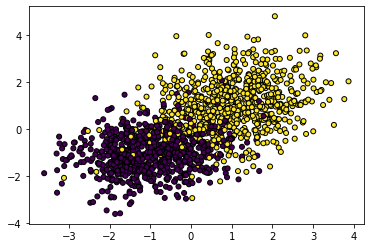

In [ ]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

In [ ]:
def sigmoid(x,w0, w1, w2):
  x1 = x[:,0]
  x2 = x[:,1]

  return 1.0/ (1.0 + np.exp(-w0 - w1 * x1 - x2 * w2))

def loss(x, y_true, w0, w1, w2):
    n = len(y_true)

    x1 = x[:,0]
    x2 = x[:,1]

    sigmoid_result = sigmoid(x,w0, w1, w2)
    zero_class = y_true * np.log(sigmoid_result)
    one_class = (1 - y_true) * np.log(1 - sigmoid_result)

    assert y_true.shape == zero_class.shape
    assert y_true.shape == one_class.shape

    logloss = np.sum(zero_class + one_class)/n
    return -logloss

def loss_grad(x, y_true, w0, w1, w2): 

    n = len(y_true)
    sigmoid_result = sigmoid(x,w0,w1, w2)

   
    x1 = x[:,0]
    x2 = x[:,1]

    grad_w0 = - (y_true - sigmoid_result).sum() / n
    grad_w1 =  - ((y_true- sigmoid_result) @ x1) .sum() / n 
    grad_w2 =  - ((y_true- sigmoid_result) @ x2) .sum() / n 
    return grad_w0, grad_w1, grad_w2  

# Функция делает сравнение sigmoid(x, w) > 0.5, если True, то берет первое занчение(1), иначе - второе (0)
def prediction(x, w0, w1, w2): 
    return np.where(sigmoid(x, w0, w1, w2) > 0.5, 1, 0)

def gradient_descent(X_train, y_train,X_test, y_test, epochs=10, lr=0.001):
    w0 = 0.0 
    w1 = 0.0
    w2 = 0.0
# loss_history -> loss_train, loss_test
    loss_train = [loss(X_train, y_train, w0, w1, w2)]
    loss_test = [loss(X_test, y_test, w0, w1, w2)]

    accuracy_test = [accuracy_score(y_test, prediction(X_test, w0, w1, w2))] # сотрим accuracy на каждом шагу

    epoch = 0 
    while epoch < epochs:
        grad_w0, grad_w1, grad_w2= loss_grad(X_train, y_train, w0, w1, w2) 

        #loss_history->loss_train, loss_test
        loss_train.append(loss(X_train, y_train, w0, w1, w2))
        loss_test.append(loss(X_test, y_test, w0, w1, w2))

        # добавили accuracy
        accuracy_test.append(accuracy_score(y_test, prediction(X_test, w0, w1, w2)))

        w0 = w0 - lr * grad_w0 
        w1 = w1 - lr * grad_w1
        w2 = w2 - lr * grad_w2
        epoch += 1
    return w0, w1, w2, loss_train, loss_test, accuracy_test

In [ ]:
w0, w1, w2, loss_train, loss_test, accuracy_test = gradient_descent(X_train, y_train, X_test, y_test, epochs=1000)

Строим графики

Text(0, 0.5, 'Loss')

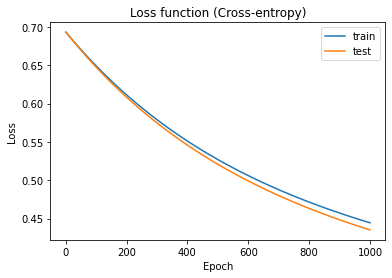

In [ ]:
plt.plot(np.arange(0, len(loss_train)), loss_train, label='train')
plt.plot(np.arange(0, len(loss_test)), loss_test, label='test')
plt.legend()

plt.title('Loss function (Cross-entropy)')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

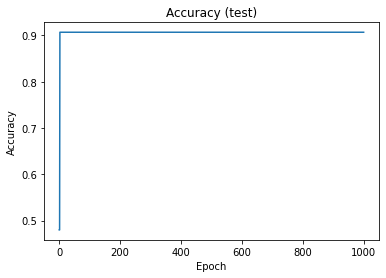

In [ ]:
plt.plot(np.arange(0, len(accuracy_test)), accuracy_test)

plt.title('Accuracy (test)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

не интересно, опять все легко и быстро нашло

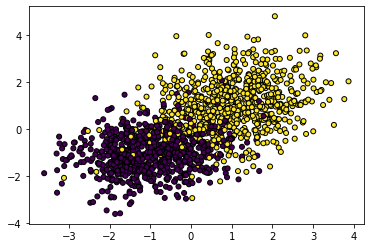

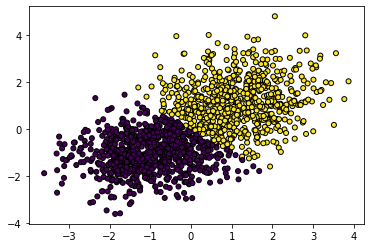

In [ ]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")
plt.pause(0.001)
pred = prediction(X,w0, w1, w2)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=pred, s=25, edgecolor="k")


Сверху исходная выборка, снизу наше решение, где линейно разделенные области

# Version 3

обощение на n фичей

ну по сути представление в матричном виде

In [238]:
# Про sigmoid

'''
x = np.array(x1, x2)
w = np.array( w0, w1, w2)
result = np.exp(-w0 - w1 * x1 - x2 * w2)
'''

x = np.array([5.0, 0.0, 0.0])
w = np.array([1.0, 2.0, 3.0])

def sigmoid(x, w):
       return (1.0 / (1 + np.exp(- x @ w ))).reshape(-1)

result = sigmoid(x, w)
print(x @ w)
print(result)

5.0
[0.99330715]


Как сделать первый столбик из единиц

In [232]:
x = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
one = np.ones((3,1))

In [233]:
np.hstack((one,x))

array([[1., 1., 2., 3.],
       [1., 4., 5., 6.],
       [1., 7., 8., 9.]])

In [234]:
from sklearn.metrics import accuracy_score

def sigmoid(x, w):
       return (1.0 / (1 + np.exp(- x @ w ))).reshape(-1)

def loss(x, y_true, w):
    n = len(y_true)

    sigmoid_result = sigmoid(x, w)
    zero_class = y_true * np.log(sigmoid_result)
    one_class = (1 - y_true) * np.log(1 - sigmoid_result)

    assert y_true.shape == zero_class.shape, '{} != {}'.format(y_true.shape, zero_class.shape)
    assert y_true.shape == one_class.shape, '{} != {}'.format(y_true.shape, one_class.shape)

    logloss = np.sum(zero_class + one_class) / n
    return -logloss


# на входе: x_shape: [n_samples, n_features +1]
# на выходе: [grad_w0, grad_w1,..., grad_w_(n_features)] | out_shape: (n_features +1) 
# для этого
# (n_features +1,m) х (m,1) = (n_features +1) 
# под m у нас?
# (y_true - sigmoid_result) размерности (n_samples,1)
# мы делали (1, n_samples) х (n_samples, n_features) = (n_features +1)
# получается, что мб m = n_samples   
def loss_grad(x, y_true, w):
    n = len(y_true)
    sigmoid_result = sigmoid(x, w)

    grad = (x.T @  -(y_true - sigmoid_result)) / n 
    # grad *= 2 * alpha * ()

    return grad

# Функция делает сравнение sigmoid(x, w) > 0.5, если True, то берет первое занчение(1), иначе - второе (0)
def prediction(x, w): 
    return np.where(sigmoid(x, w) > 0.5, 1, 0)

def gradient_descent(X_train, y_train, X_test, y_test, epochs=10, lr=0.001): # изменили количество аргументов 
    _, n_features = X_train.shape
    w = np.zeros((n_features + 1))

# см выше пример
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    loss_train = [loss(X_train, y_train, w)]
    loss_test = [loss(X_test, y_test, w)]

    accuracy_test = [accuracy_score(y_test, prediction(X_test, w))] # смотрим accuracy на каждом шагу

    epoch = 0
    while epoch < epochs:

        grad = loss_grad(X_train, y_train, w) 

        loss_train.append(loss(X_train, y_train, w))
        loss_test.append(loss(X_test, y_test, w))

        # добавили accuracy
        accuracy_test.append(accuracy_score(y_test, prediction(X_test, w)))
        w -= lr * grad


        epoch += 1
    return w, loss_train, loss_test, accuracy_test

In [240]:
w, loss_train, loss_test, accuracy_test = gradient_descent(X_train, y_train, X_test, y_test, epochs=1000)

Text(0, 0.5, 'Loss')

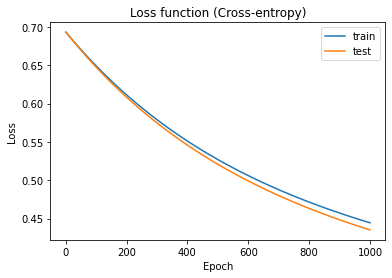

In [241]:
plt.plot(np.arange(0, len(loss_train)), loss_train, label='train')
plt.plot(np.arange(0, len(loss_test)), loss_test, label='test')
plt.legend()

plt.title('Loss function (Cross-entropy)')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

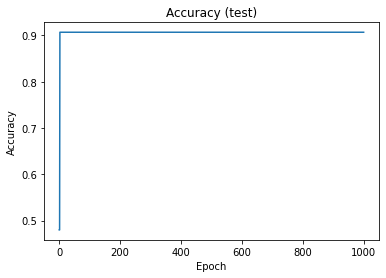

In [242]:
plt.plot(np.arange(0, len(accuracy_test)), accuracy_test)

plt.title('Accuracy (test)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

получили в районе 0.9

In [253]:
X_test_stacked = np.hstack((np.ones((X_test.shape[0], 1)), X_test)) #делаем матрицу в спервым столбиком 1

In [246]:
pred = prediction(X_test_stacked, w)

Смотрим, что получилось предсказать

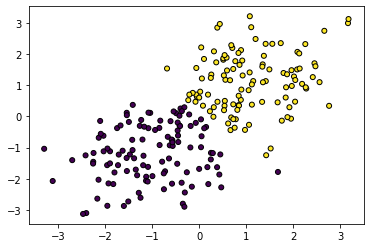

In [247]:
plt.scatter(X_test[:, 0], X_test[:, 1], marker="o", c=pred, s=25, edgecolor="k")

Посмотрим на тесте

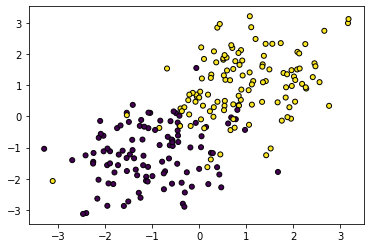

In [248]:
plt.scatter(X_test[:, 0], X_test[:, 1], marker="o", c=y_test, s=25, edgecolor="k")

Матричное представление позволяет обучаться на различного рода выборках, не зависимо от того 1 у нас фича или 100

# sklearn.LogisticRegression


In [250]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='none')
logreg.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

In [251]:
logreg.coef_, logreg.intercept_

(array([[1.39138737, 1.55433875]]), array([0.21303696]))

In [252]:
accuracy_score(X_test, y_test)

ValueError: ignored